In [118]:
# Step 1: Import packages, functions, and classes
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]


In [119]:
# Step 2: Data Processing
from sklearn.model_selection import train_test_split
bankdata = pd.read_csv('COMP0050_CourseworkData\Bank_Portfolios.csv', header = None)
bankdata.columns = ['Loans for construction and land development', 'Loans secured by farmland', 'Loans secured by 1-4 family residential properties', 'Loans secured by multi-family ( > 5) residential properties', 'Loans secured by non-farm non-residential properties', 'Agricultural loans', 'Commercial and industrial loans', 'Loans to individuals', 'All other loans (excluding consumer loans', 'Obligations (other than securities and leases) of states and Political subdivision in the U.S.', 'Held-to-maturity securities', 'Available-for-sale securities, total', 'Premises and fixed assets including capitalized lease', 'Cash', 'Debt', 'default']
x = bankdata.iloc[:,0:15]
y = bankdata.iloc[:,15]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4, stratify = y) #

#### Logistic Regression

report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2243
           1       0.41      0.25      0.31        92

    accuracy                           0.96      2335
   macro avg       0.69      0.62      0.64      2335
weighted avg       0.95      0.96      0.95      2335

The accuracy in the train set is = 0.955213
The accuracy in the test set is = 0.956317
Training Set Evaluation F1-Score =  0.28654970760233917
Testing Set Evaluation F1-Score =  0.3108108108108108


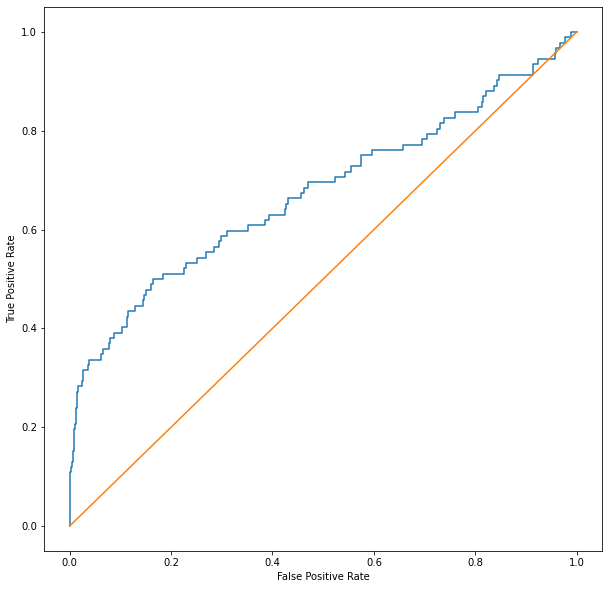

AUC: 0.6745769446975131
The optimal threshold of ROC: 0.2544314982485177


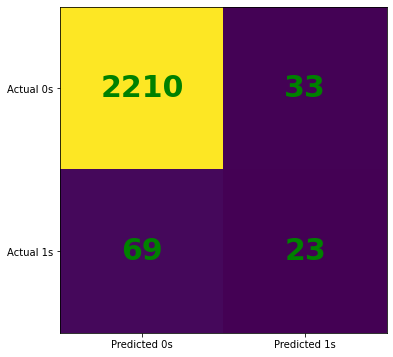

In [120]:
# Step 3: Create a model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', C = 10.0, random_state = 0, max_iter = 2000)# solver = 'liblinear', 'lbfgs', 'newton-cg'
lr.fit(x_train, y_train)

# Step 4: Evaluate the model
lr_p_pred_train = lr.predict_proba(x_train)
lr_p_pred_test = lr.predict_proba(x_test)
lr_pred_train = lr.predict(x_train)
lr_pred_test = lr.predict(x_test)
lr_score_train = lr.score(x_train, y_train)
lr_score_test = lr.score(x_test, y_test)

# Step 5: Performance Indicators
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Precision, Recall, F1 Score
report = classification_report(y_test, lr_pred_test)
print('report:', report, sep = '\n')
print('The accuracy in the train set is = %f'%lr_score_train)
print('The accuracy in the test set is = %f'%lr_score_test)
print('Training Set Evaluation F1-Score = ', f1_score(y_train, lr_pred_train))
print('Testing Set Evaluation F1-Score = ', f1_score(y_test, lr_pred_test))

# ROC Curve
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr_p_pred_test[:, 1])
plt.plot(lr_fpr, lr_tpr)
plt.plot(ns_fpr, ns_tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# AUC
lr_auc = roc_auc_score(y_test, lr_p_pred_test[:, 1])
print('AUC:', lr_auc)
optimal_idx = np.argmax(lr_tpr - lr_fpr)
optimal_threshold = thresholds[optimal_idx]
print('The optimal threshold of ROC:', optimal_threshold)

# Confusion Matrix
conf_m = confusion_matrix(y_test, lr_pred_test)
fig, ax = plt.subplots(figsize = (6, 6))
ax.imshow(conf_m)
ax.grid(False)
ax.xaxis.set(ticks = (0, 1), ticklabels = ('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks = (0, 1), ticklabels = ('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_m[i, j], ha = 'center', va = 'center', color = 'green', fontsize = 30, fontweight = 'bold')
plt.show()

The algorithm parameter solver = 'liblinear' result a accuracy of 95.63%, while the solver = 'lbfgs' result a accuracy of 95.58%, 'newton-cg' result a accuracy of 96.18% but it warnings not converge. So the parameter I've choosed is the 'liblinear', which has almost no effect on the accuracy and is the most suitable algorithm in this predict model. The solver change has almost no effect on the accuracy.